**Examples**

Rotation

In [1]:
from os.path import basename, exists

def download(url):
    filename = basename(url)
    if not exists(filename):
        from urllib.request import urlretrieve
        local, _ = urlretrieve(url, filename)
        print('Downloaded ' + local)

download('https://raw.githubusercontent.com/AllenDowney/' +
         'ModSimPy/master/modsim.py')

Downloaded modsim.py


In [2]:
from modsim import *

Setting Parameters

In [3]:
Rmin = 0.02
Rmax = 0.055
L = 47
omega = 300
Ravg = (Rmax + Rmin) / 2
Cavg = 2 * np.pi * Ravg
revs = L / Cavg
theta = 2 * np.pi * revs
k_est = (Rmax - Rmin) / theta
print(theta, k_est)

1253.3333333333335 2.7925531914893616e-05


Simulating the System

In [4]:
init = State(theta=0, y=0, r=Rmin)
system = System(init=init, t_end=10)

In [5]:
def slope_func(t, state, system):
    theta, y, r = state

    dydt = r * omega
    drdt = k_est * omega

    return omega, dydt, drdt
slope_func(0, system.init, system)

(300, 6.0, 0.008377659574468085)

In [7]:
def event_func(t, state, system):
    theta, y, r = state
    return L - y
event_func(0, system.init, system)

47.0

In [8]:
results, details = run_solve_ivp(system, slope_func, events=event_func)
details.message

'A termination event occurred.'

In [9]:
results.tail()

,theta,y,r
4.010667,1203.200000,44.277760,0.05360
4.052444,1215.733333,44.951740,0.05395
4.094222,1228.266667,45.630107,0.05430
4.136000,1240.800000,46.312860,0.05465
4.177778,1253.333333,47.000000,0.05500


In [10]:
results.index[-1]

4.177777777777779

In [11]:
final_state = results.iloc[-1]
print(final_state.y)
print(final_state.r)

47.00000000000001
0.05500000000000001


In [12]:
radians = final_state.theta
rotations = radians / 2 / np.pi
rotations

199.47419534184218

Plotting the Results

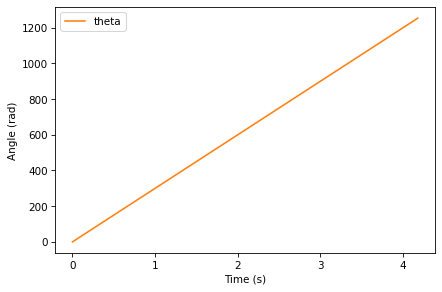

In [13]:
def plot_theta(results):
    results.theta.plot(color='C1', label='theta')
    decorate(xlabel='Time (s)',
             ylabel='Angle (rad)')

plot_theta(results)

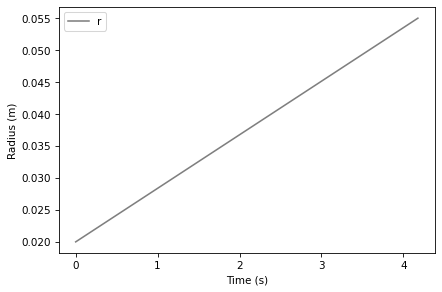

In [14]:
def plot_r(results):
    results.r.plot(color='C7', label='r')
    decorate(xlabel='Time (s)',
             ylabel='Radius (m)')

plot_r(results)

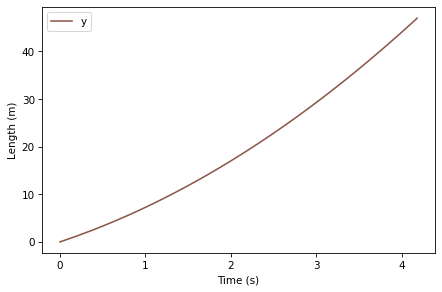

In [15]:
def plot_y(results):
    results.y.plot(color='C5', label='y')
    decorate(xlabel='Time (s)',
             ylabel='Length (m)')

plot_y(results)

Analytic Solution

In [16]:
k = (Rmax**2 - Rmin**2) / (2 * L)
k

2.7925531914893616e-05

**Exercises**

Exercise 1

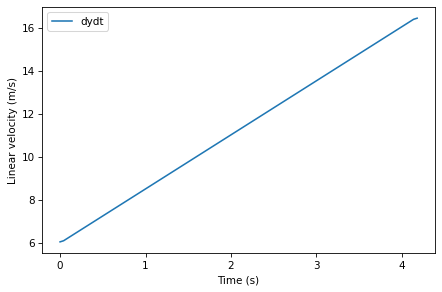

In [18]:
dydt = gradient(results.y)
dydt.plot(label='dydt')
decorate(xlabel='Time (s)',
         ylabel='Linear velocity (m/s)')

In [19]:
max_linear_velocity = dydt.iloc[-1]
max_linear_velocity

16.447499999999934

In [20]:
def slope_func(t, state, system):
    theta, y, r = state

    dydt = max_linear_velocity
    omega = dydt / r
    drdt = k * omega

    return omega, dydt, drdt
slope_func(0, system.init, system)

(822.3749999999967, 16.447499999999934, 0.022965259308510545)

In [21]:
results, details = run_solve_ivp(system, slope_func, events=event_func)
details.message

'A termination event occurred.'

In [22]:
t_final = results.index[-1]
t_final

2.8575771393828964

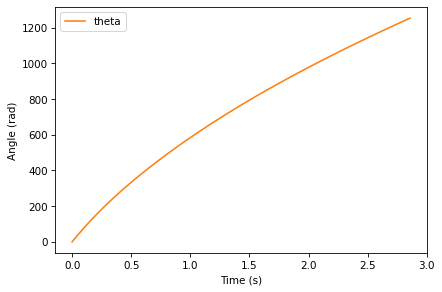

In [23]:
plot_theta(results)

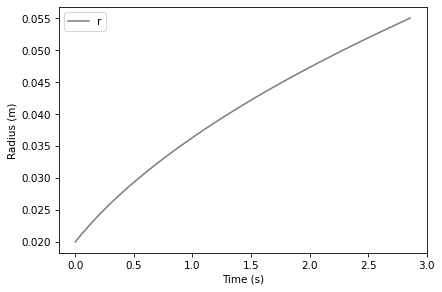

In [24]:
plot_r(results)

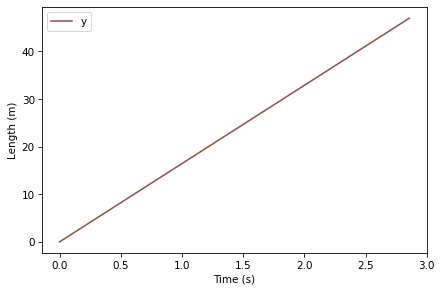

In [25]:
plot_y(results)